# Compare 2020 Polling Data Files

In [1]:
import geopandas
import numpy as np
import pandas as pd
import glob

/Users/jasmineyoung/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
sg = geopandas.read_file('../00_source_data/2020 Polling Data/polling_pk_master_post.csv')
sg = sg.replace(r'^\s*$', np.nan, regex=True)
sg = sg.astype({'latitude': 'float'})
sg = sg.astype({'longitude': 'float'})
sg = geopandas.GeoDataFrame(
    sg, geometry=geopandas.points_from_xy(sg.longitude, sg.latitude))

In [3]:
path = r'../00_source_data/2020_Polling_ByState' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = geopandas.read_file(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
cpi = geopandas.GeoDataFrame(frame)
cpi.head()

,election_date,state,county_name,jurisdiction,jurisdiction_type,precinct_id,precinct_name,polling_place_id,location_type,name,...,notes,source,source_date,source_notes,Google_geog,HERE_geog,MapQuest_geog,AzureMaps_geog,geog,geometry
0,2020-11-03,NV,Eureka,Eureka,county,1,,,election_day,Courthouse,...,Clerk Recorder's Office,Website,2020-10-26,,POINT (-115.9611209 39.5122776),POINT (-115.96119 39.51217),POINT (-115.96084 39.512223),POINT (-115.9612 39.51226),POINT (-115.9611209 39.5122776),None
1,2020-11-03,NV,Eureka,Eureka,county,2,,,election_day,Courthouse,...,Clerk Recorder's Office,Website,2020-10-26,,POINT (-115.9611209 39.5122776),POINT (-115.96119 39.51217),POINT (-115.96084 39.512223),POINT (-115.9612 39.51226),POINT (-115.9611209 39.5122776),None
2,2020-11-03,NV,Eureka,Eureka,county,3,,,election_day,Crescent Valley Community Center,...,Community Center,Website,2020-10-26,,POINT (-116.5746608 40.421233),POINT (-116.57569 40.42133),POINT (-116.583279 40.421094),POINT (-115.09648 36.03122),POINT (-116.5746608 40.421233),None
3,2020-11-03,NV,Eureka,Eureka,county,4,,,election_day,Crescent Valley Community Center,...,Community Center,Website,2020-10-26,,POINT (-116.5746608 40.421233),POINT (-116.57569 40.42133),POINT (-116.583279 40.421094),POINT (-115.09648 36.03122),POINT (-116.5746608 40.421233),None
4,2020-11-03,NV,Douglas,Douglas,county,1,,,election_day,DOUGLAS COUNTY COMMUNITY CENTER,...,UNKNOWN,Website,2020-10-26,,POINT (-119.740625 38.93332669999999),POINT (-119.74068 38.93473),,POINT (-119.7395 38.93329),POINT (-119.740625 38.93332669999999),None


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
#cpi['longitude'] = cpi.geog[0].replace('(','').replace(')','').strip('POINT').split()[0]
#cpi['latitude'] = cpi.geog[0].replace('(','').replace(')','').strip('POINT').split()[1]
def get_lat(row):
    if len(row.geog.replace('(','').replace(')','').strip('POINT').split()) == 0:
        lat = float('NaN')
        #print(len(row.geog.replace('(','').replace(')','').strip('POINT').split()))
        #print(row.geog.replace('(','').replace(')','').strip('POINT').split())
    else:
        lat = float(row.geog.replace('(','').replace(')','').strip('POINT').split()[1])
    return lat
def get_long(row):
    if len(row.geog.replace('(','').replace(')','').strip('POINT').split()) == 0:
        long = float('NaN')
    else:
        long = float(row.geog.replace('(','').replace(')','').strip('POINT').split()[0])
    return long

cpi['latitude'] = cpi.apply(lambda row: get_lat(row), axis=1)
cpi['longitude'] = cpi.apply(lambda row: get_long(row), axis=1)
cpi.head()

,election_date,state,county_name,jurisdiction,jurisdiction_type,precinct_id,precinct_name,polling_place_id,location_type,name,address,notes,source,source_date,source_notes,Google_geog,HERE_geog,MapQuest_geog,AzureMaps_geog,geog,geometry,latitude,longitude
0,2020-11-03,NV,Eureka,Eureka,county,1,,,election_day,Courthouse,"10 S. Main St., NV 89316",Clerk Recorder's Office,Website,2020-10-26,,POINT (-115.9611209 39.5122776),POINT (-115.96119 39.51217),POINT (-115.96084 39.512223),POINT (-115.9612 39.51226),POINT (-115.9611209 39.5122776),None,39.512278,-115.961121
1,2020-11-03,NV,Eureka,Eureka,county,2,,,election_day,Courthouse,"10 S. Main St., NV 89316",Clerk Recorder's Office,Website,2020-10-26,,POINT (-115.9611209 39.5122776),POINT (-115.96119 39.51217),POINT (-115.96084 39.512223),POINT (-115.9612 39.51226),POINT (-115.9611209 39.5122776),None,39.512278,-115.961121
2,2020-11-03,NV,Eureka,Eureka,county,3,,,election_day,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",Community Center,Website,2020-10-26,,POINT (-116.5746608 40.421233),POINT (-116.57569 40.42133),POINT (-116.583279 40.421094),POINT (-115.09648 36.03122),POINT (-116.5746608 40.421233),None,40.421233,-116.574661
3,2020-11-03,NV,Eureka,Eureka,county,4,,,election_day,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",Community Center,Website,2020-10-26,,POINT (-116.5746608 40.421233),POINT (-116.57569 40.42133),POINT (-116.583279 40.421094),POINT (-115.09648 36.03122),POINT (-116.5746608 40.421233),None,40.421233,-116.574661
4,2020-11-03,NV,Douglas,Douglas,county,1,,,election_day,DOUGLAS COUNTY COMMUNITY CENTER,"1329 WATERLOO LANE, NV 89410",UNKNOWN,Website,2020-10-26,,POINT (-119.740625 38.93332669999999),POINT (-119.74068 38.93473),,POINT (-119.7395 38.93329),POINT (-119.740625 38.93332669999999),None,38.933327,-119.740625


In [7]:
sg.head()

,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,startDate,endDate,address.line2,address.line3,id,geometry
0,0,223@8m4-tbj-bp9,NaN,"Tue, Nov 3: 7 am - 7 pm",21.305224,-157.857002,"[{'name': 'Voting Information Project', 'offic...",Honolulu Hale,530 South King Street,Honolulu,HI,96813,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-157.85700 21.30522)
1,1,@8m4-t4v-q4v,Invalid address,"Tue, Nov 3: 7 am - 7 pm",21.329854,-158.081865,"[{'name': 'Voting Information Project', 'offic...",Kapolei Hale,1000 Uluʻōhiʻa Street,Kapolei,HI,96707,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-158.08186 21.32985)
2,2,@8m4-793-jvz,Invalid address,"Tue, Nov 3: 7 am - 7 pm",21.090406,-157.017609,"[{'name': 'Voting Information Project', 'offic...",Mitchell Pauole Center Conference Room,90 Ainoa Street,Kaunakakai,HI,96748,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-157.01761 21.09041)
3,3,@bp5-ytd-j35,Invalid address,"Tue, Nov 3: 7 am - 7 pm",20.826513,-156.921143,"[{'name': 'Voting Information Project', 'offic...",Lanai Council District Office Lanai Community ...,Lanai Council District Office,Lanai City,HI,96763,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,8th Street,NaN,NaN,POINT (-156.92114 20.82651)
4,4,zzw-222@bp5-chr-8y9,NaN,"Tue, Nov 3: 7 am - 7 pm",20.900159,-156.491939,"[{'name': 'Voting Information Project', 'offic...",Velma McWayne Santos Community Center,395 Waena Street,Wailuku,HI,96793,Voter service centers provide accessible in-pe...,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-156.49194 20.90016)


In [8]:
cpi_NV = cpi[cpi['state'] == 'NV']
sg_NV = sg[sg['address.state'] == 'NV']

In [9]:
pd.merge(sg_NV, cpi_NV, how="inner",on=["latitude","longitude"])

,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes_x,startDate,endDate,address.line2,address.line3,id,geometry_x,election_date,state,county_name,jurisdiction,jurisdiction_type,precinct_id,precinct_name,polling_place_id,location_type,name,address,notes_y,source,source_date,source_notes,Google_geog,HERE_geog,MapQuest_geog,AzureMaps_geog,geog,geometry_y
0,8027,@5yt-dmz-2zf,Invalid address,"Tue, Nov 3: 7 am - 7 pm",37.362670,-115.168645,"[{'name': 'Voting Information Project', 'offic...",Alamo Annex,121 Joshua Tree Street,Alamo,NV,89001,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-115.16865 37.36267),2020-11-03,NV,Lincoln,Lincoln,county,1,,,election_day,Alamo Annex,"121 Joshua Street, NV 89001",,Website,2020-10-26,,POINT (-115.1686453 37.36267),POINT (-115.1686 37.36262),,POINT (-115.16859 37.36276),POINT (-115.1686453 37.36267),None
1,8030,zzw-222@5yv-gzc-87q,NaN,"Tue, Nov 3: 7 am - 7 pm",36.007799,-114.979496,"[{'name': 'Voting Information Project', 'offic...","Galloway, Fay Elementary",701 Skyline Road,Henderson,NV,89002,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-114.97950 36.00780),2020-11-03,NV,Clark,Clark,county,,,43,vote_center,"Galloway, Fay Elem.","701 Skyline Rd., HEN 89002",,Website,2020-10-26,,POINT (-114.979496 36.0077986),POINT (-114.97975 36.00809),POINT (-114.981124 36.008109),POINT (-114.97976 36.0081),POINT (-114.979496 36.0077986),None
2,8033,222-222@5yv-gws-28v,NaN,"Tue, Nov 3: 7 am - 7 pm",36.029789,-114.993956,"[{'name': 'Voting Information Project', 'offic...","Burkholder, Lyal Middle School",355 West Van Wagenen Street,Henderson,NV,89015,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-114.99396 36.02979),2020-11-03,NV,Clark,Clark,county,,,14,vote_center,"Burkholder, Lyal Mid. Sch.","355 W. Van Wagenen St., HEN 89015",,Website,2020-10-26,,POINT (-114.9939558 36.029789),POINT (-114.99621 36.03174),POINT (-114.992023 36.030319),POINT (-114.99265 36.02922),POINT (-114.9939558 36.029789),None
3,8034,222@5yv-gy2-zcq,NaN,"Tue, Nov 3: 7 am - 7 pm",36.083733,-114.960444,"[{'name': 'Voting Information Project', 'offic...","Stevens, Josh Elementary",550 Dave Wood Circle,Henderson,NV,89011,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-114.96044 36.08373),2020-11-03,NV,Clark,Clark,county,,,106,vote_center,"Stevens, Josh Elem.","550 Dave Wood Cir., HEN 89011",,Website,2020-10-26,,POINT (-114.960444 36.0837326),POINT (-114.96202 36.08462),,POINT (-114.96088 36.0849),POINT (-114.960444 36.0837326),None
4,8043,224-222@5yv-gxg-j5f,NaN,"Tue, Nov 3: 7 am - 7 pm",36.058710,-115.066801,"[{'name': 'Voting Information Project', 'offic...","McDoniel, Estes Elementary",1831 Fox Ridge Drive,Henderson,NV,89014,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-115.06680 36.05871),2020-11-03,NV,Clark,Clark,county,,,73,vote_center,"McDoniel, Estes Elem.","1831 Fox Ridge Dr., HEN 89014",,Website,2020-10-26,,POINT (-115.0668015 36.0587097),POINT (-115.06701 36.05862),POINT (-115.067178 36.057953),POINT (-115.06701 36.05863),POINT (-115.0668015 36.0587097),None
5,8046,222-222@5yv-jc5-s89,NaN,"Tue, Nov 3: 7 am - 7 pm",36.059410,-115.091914,"[{'name': 'Voting Information Project', 'offic...","Mack, Nate Elementary",3170 Laurel Avenue,Henderson,NV,89014,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-115.09191 36.05941),2020-11-03,NV,Clark,Clark,county,,,68,vote_center,"Mack, Nate Elem.","3170 Laurel Ave., HEN 89014",,Website,2020-10-26,,POINT (-115.0919138 36.05941),POINT (-115.09203 36.05972),POINT (-115.092578 36.059107),POINT (-115.09203 36.05972),POINT (-115.0919138 36.05941),None
6,8049,zzw-223@5yv-gps-y9z,NaN,"Tue, Nov 3: 7 am - 7 pm",35.955876,-115.096092,"[{'name': 'Voting Information Project', 'offic...",Sun City Anthem Community Center,2450 Hampton Road,Henderson,NV,89052,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-115.09609 35.95588),2020-11-03,NV,Clark,Clark,county,,,108,vote_center,Sun City Anthem Community Ctr.,"2450 Hampton Rd., HEN 89052",,Website,20

In [10]:
state_list = list(cpi['state'].unique())
sg_adjusted = sg[sg['address.state'].isin(state_list)]

In [11]:
#cpi_adjusted = cpi.drop(columns=['precinct_id'])
cpi_adjusted = cpi[['state','name','address','geog','latitude','longitude']]
print(len(cpi_adjusted))
cpi_adjusted = cpi_adjusted.drop_duplicates()
print(len(cpi_adjusted))

103845
67395


In [12]:
cpi_adjusted = cpi_adjusted.dropna(subset=['latitude', 'longitude'])
print(len(cpi_adjusted))

66831


In [13]:
%%time
#sg.join(cpi, how="inner",on=['latitude','longitude'])
new_df = pd.merge(sg_adjusted, cpi_adjusted, how="inner",on=["latitude","longitude"])
print(len(new_df))
new_df.head()

17428
CPU times: user 711 ms, sys: 12.5 ms, total: 724 ms
Wall time: 725 ms


,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,startDate,endDate,address.line2,address.line3,id,geometry,state,name,address,geog
0,9,@5pz-knx-7t9,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.014809,-90.431157,"[{'name': 'Voting Information Project', 'offic...",ST JOHN'S LUTHERAN GYM,601 Jefferson Street,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.43116 40.01481),IL,ST JOHN'S LUTHERAN GYM,"601 JEFFERSON,, BEARDSTOWN, IL 62618",POINT (-90.43115709999999 40.0148094)
1,9,@5pz-knx-7t9,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.014809,-90.431157,"[{'name': 'Voting Information Project', 'offic...",ST JOHN'S LUTHERAN GYM,601 Jefferson Street,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.43116 40.01481),IL,ST JOHN'S LUTHERAN GYM,"601 JEFFERSON, BEARDSTOWN, IL 62618",POINT (-90.43115709999999 40.0148094)
2,14,224@5pz-msm-7t9,NaN,"Tue, Nov 3: 6 am - 7 pm",39.765968,-90.402468,"[{'name': 'Voting Information Project', 'offic...",AMERICAN LEGION BUILDING,534 Superior Street,Chapin,IL,62628,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.40247 39.76597),IL,AMERICAN LEGION BUILDING,"534 SUPERIOR STREET, CHAPIN, IL 62628",POINT (-90.4024683 39.7659685)
3,16,222@5pz-kkq-nnq,NaN,"Tue, Nov 3: 6 am - 7 pm",40.069925,-90.430305,"[{'name': 'Voting Information Project', 'offic...",FREDERICK CHRISTIAN CHURCH,25740 ADAMS RD,Frederick,IL,62639,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.43031 40.06992),IL,FREDERICK CHRISTIAN CHURCH,"25740 ADAMS RD, FREDERICK, IL 62639",POINT (-90.4303051 40.069925)
4,30,228@5pv-hg5-249,NaN,"Tue, Nov 3: 6 am - 7 pm",40.067177,-89.442436,"[{'name': 'Voting Information Project', 'offic...",BROADWELL TOWN HALL BROADWELL,105 East Pine Street,Broadwell,IL,62634,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-89.44244 40.06718),IL,BROADWELL TOWN HALL BROADWELL,"105 E PINE, BROADWELL, IL 62634",POINT (-89.44243609999999 40.067177)


In [14]:
new_df_drop = new_df.drop_duplicates()

In [15]:
print(len(new_df))
print(len(new_df_drop))

17428
17428


In [16]:
#sg.join(cpi, how="inner",on=['latitude','longitude'])
new_df_left = pd.merge(sg_adjusted, cpi_adjusted, how="left",on=["latitude","longitude"])
print(len(new_df_left))

50296


In [17]:
new_df_right = pd.merge(sg_adjusted, cpi_adjusted, how="right",on=["latitude","longitude"])
print(len(new_df_right))

67858


In [18]:
len(sg_adjusted)

48519

How many polling places in SafeGraph?
- 59,538 total polling places across the US

How many polling places in SafeGraph (for CPI States)?
- 48,519 polling places across 35 states

How many polling places in CPI?
- 103,845 total polling places across 35 states, with lots of duplicates across precincts

How many duplicates in Safegraph?
- None

How many duplicates in CPI?
- 66,831 left after dropping duplicates (36,450 records) and NA latitude/longitude (564 records)

How many polling places match on Latitude/Longitude?
- 17,428

Do the matching polling places cover all states?
- Yes, all 35 are represented in the 17,428

In [19]:
len(new_df['state'].unique())

35

In [20]:
joined_state = pd.DataFrame(new_df.groupby('state')['latitude'].count())
joined_state = joined_state.reset_index()
joined_state = joined_state.rename(columns={"latitude":"inner_count"})

In [21]:
cpi_state = pd.DataFrame(cpi_adjusted.groupby('state')['latitude'].count())
cpi_state = cpi_state.reset_index()
cpi_state = cpi_state.rename(columns={"latitude":"cpi_count"})

In [22]:
sg_state = pd.DataFrame(sg_adjusted.groupby('address.state')['latitude'].count())
sg_state = sg_state.reset_index()
sg_state = sg_state.rename(columns={"address.state": "state", "latitude":"sg_count"})

In [23]:
sg_state.head()

,state,sg_count
0,AK,172
1,AL,1284
2,AR,790
3,CA,2993
4,CT,549


In [24]:
joined_state.head()

,state,inner_count
0,AK,38
1,AL,539
2,AR,251
3,CA,1029
4,CT,253


In [25]:
cpi_state.head()

,state,cpi_count
0,AK,350
1,AL,2022
2,AR,934
3,CA,3817
4,CT,690


In [26]:
final_state = pd.merge(joined_state, cpi_state, how="outer",on=["state"])
final_state.head()

,state,inner_count,cpi_count
0,AK,38,350
1,AL,539,2022
2,AR,251,934
3,CA,1029,3817
4,CT,253,690


In [27]:
final_state = pd.merge(final_state, sg_state, how="outer", on=["state"])
final_state.head()

,state,inner_count,cpi_count,sg_count
0,AK,38,350,172
1,AL,539,2022,1284
2,AR,251,934,790
3,CA,1029,3817,2993
4,CT,253,690,549


In [28]:
final_state['sg_pct_coverage'] = np.round(100*final_state['inner_count']/final_state['sg_count'],2)
final_state['cpi_pct_coverage'] = np.round(100*final_state['inner_count']/final_state['cpi_count'],2)
final_state

,state,inner_count,cpi_count,sg_count,sg_pct_coverage,cpi_pct_coverage
0,AK,38,350,172,22.09,10.86
1,AL,539,2022,1284,41.98,26.66
2,AR,251,934,790,31.77,26.87
3,CA,1029,3817,2993,34.38,26.96
4,CT,253,690,549,46.08,36.67
5,DE,74,273,180,41.11,27.11
6,FL,61,421,3089,1.97,14.49
7,GA,572,2415,1743,32.82,23.69
8,IA,308,1345,943,32.66,22.90
9,IL,1636,6381,3492,46.85,25.64


In [29]:
import dataframe_image as dfi
df_styled = final_state.style.background_gradient() #adding a gradient based on values in cell

In [30]:
df_styled

,state,inner_count,cpi_count,sg_count,sg_pct_coverage,cpi_pct_coverage
0,AK,38,350,172,22.090000,10.860000
1,AL,539,2022,1284,41.980000,26.660000
2,AR,251,934,790,31.770000,26.870000
3,CA,1029,3817,2993,34.380000,26.960000
4,CT,253,690,549,46.080000,36.670000
5,DE,74,273,180,41.110000,27.110000
6,FL,61,421,3089,1.970000,14.490000
7,GA,572,2415,1743,32.820000,23.690000
8,IA,308,1345,943,32.660000,22.900000
9,IL,1636,6381,3492,46.850000,25.640000


In [31]:
dfi.export(df_styled,"mytable.png")

In [32]:
cpi_adjusted.head()

,state,name,address,geog,latitude,longitude
0,NV,Courthouse,"10 S. Main St., NV 89316",POINT (-115.9611209 39.5122776),39.512278,-115.961121
2,NV,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",POINT (-116.5746608 40.421233),40.421233,-116.574661
4,NV,DOUGLAS COUNTY COMMUNITY CENTER,"1329 WATERLOO LANE, NV 89410",POINT (-119.740625 38.93332669999999),38.933327,-119.740625
45,NV,KAHLE COMMUNITY CENTER,"236 KINGSBURY GRADE ROAD, NV 89449",POINT (-119.9321997 38.9693987),38.969399,-119.932200
86,NV,TOPAZ RANCH ESTATES COMMUNITY CENTER,"3939 CARTER DRIVE, NV 89444",POINT (-119.501347 38.7326871),38.732687,-119.501347


In [33]:
sg_adjusted.head()

,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,startDate,endDate,address.line2,address.line3,id,geometry
8,8,@5pz-s4p-x89,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.191624,-90.144169,"[{'name': 'Voting Information Project', 'offic...",FIRE HOUSE IN BATH,107 West 1st Street,Bath,IL,62617,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.14417 40.19162)
9,9,@5pz-knx-7t9,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.014809,-90.431157,"[{'name': 'Voting Information Project', 'offic...",ST JOHN'S LUTHERAN GYM,601 Jefferson Street,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.43116 40.01481)
10,10,225@5pz-kpb-mrk,NaN,"Tue, Nov 3: 6 am - 7 pm",40.008018,-90.410502,"[{'name': 'Voting Information Project', 'offic...",BDST PARK SCHEWE COMM CTR,6 ARMORY LANE,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.41050 40.00802)
11,11,@5pz-n93-kpv,Invalid address,"Tue, Nov 3: 6 am - 7 pm",39.876115,-90.367719,"[{'name': 'Voting Information Project', 'offic...",VILLAGE CITY HALL ZUSCHKA SQ,201 East Main Street,Arenzville,IL,62611,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.36772 39.87611)
12,12,@5pz-q2v-n89,Invalid address,"Tue, Nov 3: 6 am - 7 pm",39.748121,-90.535252,"[{'name': 'Voting Information Project', 'offic...",SENIOR CITIZENS BUILDING,103 S Bluffs Street,Bluffs,IL,62621,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.53525 39.74812)


### Try with rounded latitude/longitude 

In [34]:
def inner_match(n,sg_adjusted,cpi_adjusted):
    temp_sg = sg_adjusted.copy()
    temp_cpi = cpi_adjusted.copy()
    temp_sg['latitude'] = round(temp_sg['latitude'],n)
    temp_sg['longitude'] = round(temp_sg['longitude'],n)
    temp_cpi['latitude'] = round(temp_cpi['latitude'],n)
    temp_cpi['longitude'] = round(temp_cpi['longitude'],n)
    temp_cpi = temp_cpi.reset_index()
    new_df = pd.merge(temp_sg, temp_cpi, how="inner",on=["latitude","longitude"])
    return new_df

In [35]:
#Track maximum decimal length
temp_sg = sg_adjusted.copy()
temp_cpi = cpi_adjusted.copy()
temp_sg['latitude_len'] = temp_sg['latitude'].astype(str).map(len)
temp_sg['longitude_len'] = temp_sg['longitude'].astype(str).map(len)
temp_cpi['latitude_len'] = temp_cpi['latitude'].astype(str).map(len)
temp_cpi['longitude_len'] = temp_cpi['longitude'].astype(str).map(len)
print(temp_sg['latitude_len'].max())
print(temp_sg['longitude_len'].max())
print(temp_cpi['latitude_len'].max())
print(temp_cpi['longitude_len'].max())

18
19
17
18


Decimal places can go from 7 to 19.

In [36]:
round10 = inner_match(2,sg_adjusted,cpi_adjusted)
print(len(round10))
print(len(round10['query_id'].unique()))
print(len(round10['index'].unique()))
round10.head()

60102
43695
49240


,query_id,placekey,error,pollingHours,latitude,longitude,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,startDate,endDate,address.line2,address.line3,id,geometry,index,state,name,address,geog
0,8,@5pz-s4p-x89,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.19,-90.14,"[{'name': 'Voting Information Project', 'offic...",FIRE HOUSE IN BATH,107 West 1st Street,Bath,IL,62617,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.14417 40.19162),43442,IL,FIRE HOUSE IN BATH,"107 FIRST ST., BATH, IL 62617",POINT (-90.1441694 40.1916238)
1,9,@5pz-knx-7t9,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.01,-90.43,"[{'name': 'Voting Information Project', 'offic...",ST JOHN'S LUTHERAN GYM,601 Jefferson Street,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.43116 40.01481),38356,IL,ST JOHN'S LUTHERAN GYM,"601 JEFFERSON,, BEARDSTOWN, IL 62618",POINT (-90.43115709999999 40.0148094)
2,9,@5pz-knx-7t9,Invalid address,"Tue, Nov 3: 6 am - 7 pm",40.01,-90.43,"[{'name': 'Voting Information Project', 'offic...",ST JOHN'S LUTHERAN GYM,601 Jefferson Street,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.43116 40.01481),38358,IL,ST JOHN'S LUTHERAN GYM,"601 JEFFERSON, BEARDSTOWN, IL 62618",POINT (-90.43115709999999 40.0148094)
3,10,225@5pz-kpb-mrk,NaN,"Tue, Nov 3: 6 am - 7 pm",40.01,-90.41,"[{'name': 'Voting Information Project', 'offic...",BDST PARK SCHEWE COMM CTR,6 ARMORY LANE,Beardstown,IL,62618,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.41050 40.00802),38353,IL,BDST PARK SCHEWE COMM CTR,"6 ARMORY LANE,, BEARDSTOWN, IL 62618",POINT (-90.41050229999999 40.0080183)
4,11,@5pz-n93-kpv,Invalid address,"Tue, Nov 3: 6 am - 7 pm",39.88,-90.37,"[{'name': 'Voting Information Project', 'offic...",VILLAGE CITY HALL ZUSCHKA SQ,201 East Main Street,Arenzville,IL,62611,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN,POINT (-90.36772 39.87611),38350,IL,VILLAGE CITY HALL ZUSCHKA SQ,"201 E MAIN ST, ARENZVILLE, IL 62611",POINT (-90.36771879999999 39.8761148)


In [37]:
uniq_q_10 = round10.drop_duplicates(subset="query_id")
print(len(uniq_q_10))
print(len(uniq_q_10['query_id'].unique()))
print(len(uniq_q_10['index'].unique()))

43695
43695
40166


In [38]:
uniq_i_10 = round10.drop_duplicates(subset="index")
print(len(uniq_i_10))
print(len(uniq_i_10['query_id'].unique()))
print(len(uniq_i_10['index'].unique()))

49240
40166
49240


In [39]:
print('The number of overlapping indices (CPI) is {}.'.format(len(uniq_q_10['query_id'].unique()) - len(uniq_q_10['index'].unique())))
print('The number of overlapping queries (SG) is {}.'.format(len(uniq_i_10['index'].unique()) - len(uniq_i_10['query_id'].unique())))

The number of overlapping indices (CPI) is 3529.
The number of overlapping queries (SG) is 9074.


In [40]:
def track_merge():
    unique_matches = []
    cpi_overlap = []
    sg_overlap = []
    for i in range(2,30):
        rounddf = inner_match(i,sg_adjusted,cpi_adjusted)
        uniq_q = rounddf.drop_duplicates(subset="query_id")
        uniq_i = rounddf.drop_duplicates(subset="index")
        cpi_overlap.append(len(uniq_q['query_id'].unique()) - len(uniq_q['index'].unique()))
        sg_overlap.append(len(uniq_i['index'].unique()) - len(uniq_i['query_id'].unique()))
        unique_matches.append(min(len(uniq_i['query_id'].unique()),len(uniq_i['index'].unique())))
    return pd.DataFrame({"Unique Matches":unique_matches, "CPI Overlap":cpi_overlap, "SG Overlap":sg_overlap})

In [41]:
final_df = track_merge()

In [42]:
final_df

,Unique Matches,CPI Overlap,SG Overlap
0,40166,3529,9074
1,41224,1080,3078
2,40572,1005,2891
3,40206,993,2849
4,39247,963,2782
5,40318,991,2848
6,40318,991,2848
7,40318,991,2848
8,40318,991,2848
9,40318,991,2848


In [43]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Matches by Decimal Rounding')

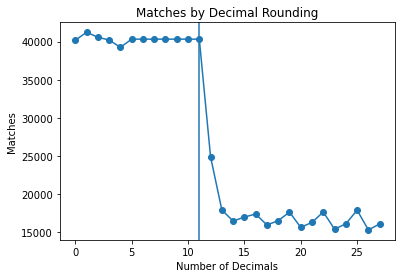

In [171]:
plt.plot(final_df.index,final_df['Unique Matches'],linestyle='-', marker='o')
plt.xlabel('Number of Decimals')
plt.ylabel('Matches')
plt.title('Matches by Decimal Rounding')

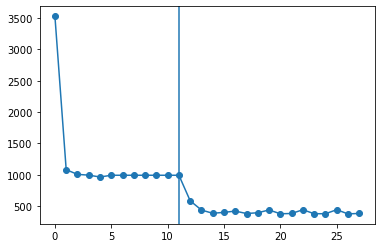

In [143]:
plt.plot(final_df.index,final_df['CPI Overlap'],linestyle='-', marker='o')
plt.xlabel('Number of Decimals')
plt.ylabel('CPI Overlap')
plt.title('CPI Overlap by Decimal Rounding')

Text(0.5, 1.0, 'SG Overlap by Decimal Rounding')

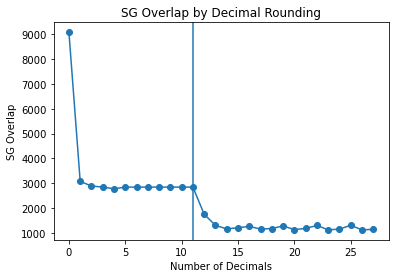

In [145]:
plt.plot(final_df.index,final_df['SG Overlap'],linestyle='-', marker='o')
plt.xlabel('Number of Decimals')
plt.ylabel('SG Overlap')
plt.title('SG Overlap by Decimal Rounding')

### Let's Try Buffering

In [52]:
cpi_adjusted.head()

,state,name,address,geog,latitude,longitude
0,NV,Courthouse,"10 S. Main St., NV 89316",POINT (-115.9611209 39.5122776),39.512278,-115.961121
2,NV,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",POINT (-116.5746608 40.421233),40.421233,-116.574661
4,NV,DOUGLAS COUNTY COMMUNITY CENTER,"1329 WATERLOO LANE, NV 89410",POINT (-119.740625 38.93332669999999),38.933327,-119.740625
45,NV,KAHLE COMMUNITY CENTER,"236 KINGSBURY GRADE ROAD, NV 89449",POINT (-119.9321997 38.9693987),38.969399,-119.932200
86,NV,TOPAZ RANCH ESTATES COMMUNITY CENTER,"3939 CARTER DRIVE, NV 89444",POINT (-119.501347 38.7326871),38.732687,-119.501347


In [55]:
import geopandas as gpd

In [84]:
wkt = """PROJCS["USA_Contiguous_Equidistant_Conic",
        GEOGCS["GCS_North_American_1983",
            DATUM["North_American_Datum_1983",
                SPHEROID["GRS_1980",6378137,298.257222101]],
            PRIMEM["Greenwich",0],
            UNIT["Degree",0.017453292519943295]],
        PROJECTION["Equidistant_Conic"],
        PARAMETER["False_Easting",0],
        PARAMETER["False_Northing",0],
        PARAMETER["Longitude_Of_Center",-96],
        PARAMETER["Standard_Parallel_1",33],
        PARAMETER["Standard_Parallel_2",45],
        PARAMETER["Latitude_Of_Center",39],
        UNIT["Meter",1],
        AUTHORITY["EPSG","102005"]]"""
cpi_geo = gpd.GeoDataFrame(cpi_adjusted, geometry=gpd.points_from_xy(cpi_adjusted.longitude, cpi_adjusted.latitude))
cpi_geo = cpi_geo.set_crs(epsg=4326)
cpi_geo = cpi_geo.to_crs(wkt)
cpi_geo = cpi_geo.reset_index()

In [86]:
cpi_geo1 = cpi_geo.copy()
cpi_geo1.geometry = cpi_geo.geometry.buffer(0.2)
cpi_geo1 = cpi_geo1.reset_index()
cpi_geo1.head()

,level_0,index,state,name,address,geog,latitude,longitude,geometry
0,0,0,NV,Courthouse,"10 S. Main St., NV 89316",POINT (-115.9611209 39.5122776),39.512278,-115.961121,"POLYGON ((-1693682.045 242953.195, -1693682.04..."
1,1,2,NV,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",POINT (-116.5746608 40.421233),40.421233,-116.574661,"POLYGON ((-1722293.402 352886.585, -1722293.40..."
2,2,4,NV,DOUGLAS COUNTY COMMUNITY CENTER,"1329 WATERLOO LANE, NV 89410",POINT (-119.740625 38.93332669999999),38.933327,-119.740625,"POLYGON ((-2024230.777 257544.901, -2024230.77..."
3,3,45,NV,KAHLE COMMUNITY CENTER,"236 KINGSBURY GRADE ROAD, NV 89449",POINT (-119.9321997 38.9693987),38.969399,-119.932200,"POLYGON ((-2039151.471 265680.909, -2039151.47..."
4,4,86,NV,TOPAZ RANCH ESTATES COMMUNITY CENTER,"3939 CARTER DRIVE, NV 89444",POINT (-119.501347 38.7326871),38.732687,-119.501347,"POLYGON ((-2009960.741 230722.417, -2009960.74..."


In [87]:
sg_geo = gpd.GeoDataFrame(sg_adjusted, geometry='geometry')
sg_geo = sg_geo.set_crs(epsg=4326)
sg_geo = sg_geo.to_crs(wkt)

In [88]:
geo_join = cpi_geo1.sjoin(sg_geo, how="inner", predicate='contains')

In [89]:
geo_join.head()

,level_0,index,state,name,address,geog,latitude_left,longitude_left,geometry,index_right,query_id,placekey,error,pollingHours,latitude_right,longitude_right,sources,address.locationName,address.line1,address.city,address.state,address.zip,notes,startDate,endDate,address.line2,address.line3,id
0,0,0,NV,Courthouse,"10 S. Main St., NV 89316",POINT (-115.9611209 39.5122776),39.512278,-115.961121,"POLYGON ((-1693682.045 242953.195, -1693682.04...",8210,8210,@5z3-v42-ffz,Invalid address,"Tue, Nov 3: 7 am - 7 pm",39.512278,-115.961121,"[{'name': 'Voting Information Project', 'offic...",Courthouse,10 South Main Street,Eureka,NV,89316,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN
1,1,2,NV,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",POINT (-116.5746608 40.421233),40.421233,-116.574661,"POLYGON ((-1722293.402 352886.585, -1722293.40...",8215,8215,@5z2-pfx-f4v,Invalid address,"Tue, Nov 3: 7 am - 7 pm",40.421233,-116.574661,"[{'name': 'Voting Information Project', 'offic...",Crescent Valley Community Center,64 McDaniel Avenue,Crescent Valley,NV,89821,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN
5,5,127,NV,WASHOE TRIBE COMMUNITY CENTER,"828 ME HU STREET, NV 89460",POINT (-119.7168095 38.898257),38.898257,-119.716809,"POLYGON ((-2023247.163 253254.263, -2023247.16...",8162,8162,222@5yx-dm6-snq,NaN,"Tue, Nov 3: 7 am - 7 pm",38.898257,-119.716809,"[{'name': 'Voting Information Project', 'offic...",WASHOE TRIBE COMMUNITY CENTER,828 Me Hu Street,Gardnerville,NV,89460,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN
8,8,188,NV,Amargosa Valley Community Center,"829 Amargosa Farm Road, NV 89020",POINT (-116.4591302 36.5692979),36.569298,-116.459130,"POLYGON ((-1807898.331 -66164.152, -1807898.33...",8206,8206,223-222@5ys-swb-m49,NaN,"Tue, Nov 3: 7 am - 7 pm",36.569298,-116.459130,"[{'name': 'Voting Information Project', 'offic...",Amargosa Valley Community Center,829 East Amargosa Farm Road,Amargosa Valley,NV,89020,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN
9,9,189,NV,Donald L. Simpson Community Center,"650 Civic Drive, NV 89045",POINT (-117.1572814 38.6939987),38.693999,-117.157281,"POLYGON ((-1814285.513 177409.823, -1814285.51...",8209,8209,@5yx-pj2-73q,Invalid address,"Tue, Nov 3: 7 am - 7 pm",38.693999,-117.157281,"[{'name': 'Voting Information Project', 'offic...",Donald L. Simpson Community Center,650 Civic Drive,Round Mountain,NV,89045,NaN,11/3/2020,11/3/2020,NaN,NaN,NaN


In [90]:
print(len(geo_join.index.unique()))
print(len(geo_join.query_id.unique()))
print(len(geo_join))

43110
41251
45636


In [169]:
cpi_geo.head()

,index,state,name,address,geog,latitude,longitude,geometry
0,0,NV,Courthouse,"10 S. Main St., NV 89316",POINT (-115.9611209 39.5122776),39.512278,-115.961121,POINT (-1693682.245 242953.195)
1,2,NV,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",POINT (-116.5746608 40.421233),40.421233,-116.574661,POINT (-1722293.602 352886.585)
2,4,NV,DOUGLAS COUNTY COMMUNITY CENTER,"1329 WATERLOO LANE, NV 89410",POINT (-119.740625 38.93332669999999),38.933327,-119.740625,POINT (-2024230.977 257544.901)
3,45,NV,KAHLE COMMUNITY CENTER,"236 KINGSBURY GRADE ROAD, NV 89449",POINT (-119.9321997 38.9693987),38.969399,-119.932200,POINT (-2039151.671 265680.909)
4,86,NV,TOPAZ RANCH ESTATES COMMUNITY CENTER,"3939 CARTER DRIVE, NV 89444",POINT (-119.501347 38.7326871),38.732687,-119.501347,POINT (-2009960.941 230722.417)


In [162]:
def track_buffer():
    unique_matches = []
    cpi_overlap = []
    sg_overlap = []
    buffer_vals = []
    for i in range(1,200):
        cpi_geo_temp = cpi_geo.copy()
        cpi_geo_temp.geometry = cpi_geo_temp.geometry.buffer(i/10000000000.0)
        geo_join = cpi_geo_temp.sjoin(sg_geo, how="inner", predicate='contains')
        uniq_q = geo_join.drop_duplicates(subset="query_id")
        uniq_i = geo_join.drop_duplicates(subset="index")
        cpi_overlap.append(len(uniq_q['query_id'].unique()) - len(uniq_q['index'].unique()))
        sg_overlap.append(len(uniq_i['index'].unique()) - len(uniq_i['query_id'].unique()))
        unique_matches.append(min(len(uniq_i['query_id'].unique()),len(uniq_i['index'].unique())))
        buffer_vals.append(i/10000000000.0)
    return pd.DataFrame({"Unique Matches":unique_matches, "CPI Overlap":cpi_overlap, "SG Overlap":sg_overlap, "Buffer Value":buffer_vals})

In [163]:
geo_df = track_buffer()

In [170]:
geo_df

,Unique Matches,CPI Overlap,SG Overlap,Buffer Value
0,10198,291,810,1.000000e-10
1,19046,481,1387,2.000000e-10
2,19835,483,1425,3.000000e-10
3,19909,484,1426,4.000000e-10
4,19909,484,1426,5.000000e-10
5,19923,484,1426,6.000000e-10
6,19932,484,1426,7.000000e-10
7,19935,484,1426,8.000000e-10
8,20205,490,1442,9.000000e-10
9,20613,515,1474,1.000000e-09


Text(0.5, 1.0, 'Number of Matches by Buffer Value')

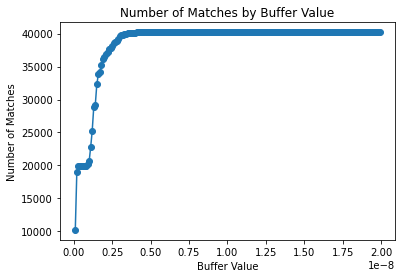

In [164]:
#geo_df
plt.plot(geo_df['Buffer Value'],geo_df['Unique Matches'],linestyle='-', marker='o')
plt.xlabel('Buffer Value')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Buffer Value')

Text(0.5, 1.0, 'CPI Overlap by Buffer Value')

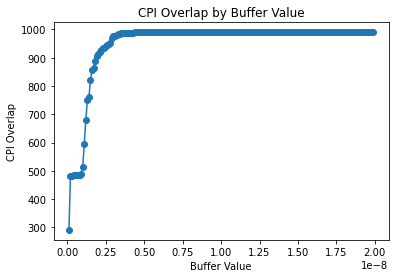

In [167]:
plt.plot(geo_df['Buffer Value'],geo_df['CPI Overlap'],linestyle='-', marker='o')
plt.xlabel('Buffer Value')
plt.ylabel('CPI Overlap')
plt.title('CPI Overlap by Buffer Value')

Text(0.5, 1.0, 'SG Overlap by Buffer Value')

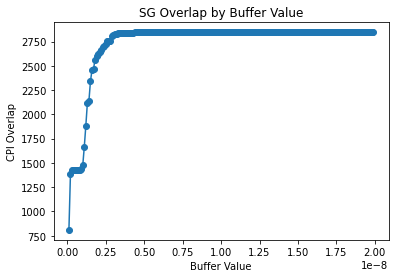

In [168]:
plt.plot(geo_df['Buffer Value'],geo_df['SG Overlap'],linestyle='-', marker='o')
plt.xlabel('Buffer Value')
plt.ylabel('CPI Overlap')
plt.title('SG Overlap by Buffer Value')

In [147]:
geo_df.head()

,Unique Matches,CPI Overlap,SG Overlap,Buffer Value
0,40215,990,2846,0.001
1,40215,990,2846,0.002
2,40215,990,2846,0.003
3,40215,990,2846,0.004
4,40215,990,2846,0.005


17428


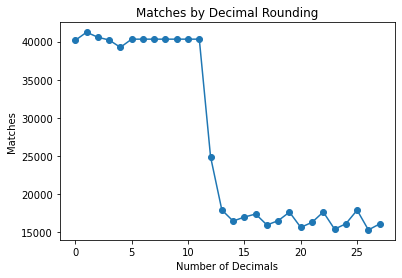

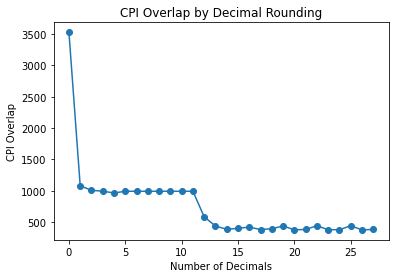

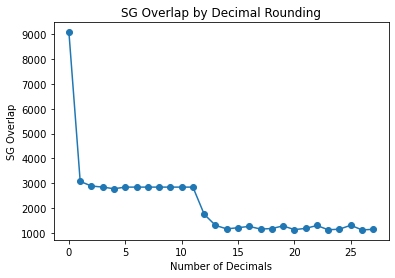

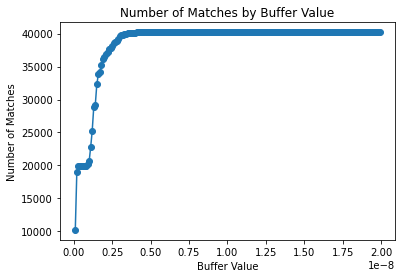

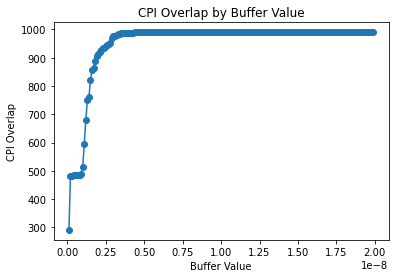

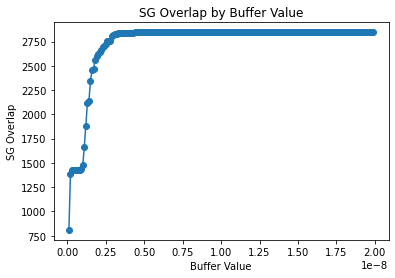

In [188]:
%run 102_2020Merge.py

In [16]:
%run 102_2020Merge.py


In [17]:
%run 105_NearestPolling_01.py

In [2]:
import geopandas as gpd


In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import geopy.distance
from shapely.ops import nearest_points

polling = pd.read_csv(
    "../20_intermediate_files/final_2020_polling.csv"
)
early = pd.read_csv("../00_source_data/2020 Polling Data/earlyVote_pk_master.csv")
dropoff = pd.read_csv("../00_source_data/2020 Polling Data/dropoff_pk_master.csv")


/Users/jasmineyoung/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
polling = polling.replace(r"^\s*$", np.nan, regex=True)
polling = polling.astype({"latitude_left": "float"})
polling = polling.astype({"longitude_left": "float"})
polling_gdf = gpd.GeoDataFrame(
    polling, geometry=gpd.points_from_xy(polling.longitude_left, polling.latitude_left)
)
wkt = """PROJCS["USA_Contiguous_Equidistant_Conic",
        GEOGCS["GCS_North_American_1983",
            DATUM["North_American_Datum_1983",
                SPHEROID["GRS_1980",6378137,298.257222101]],
            PRIMEM["Greenwich",0],
            UNIT["Degree",0.017453292519943295]],
        PROJECTION["Equidistant_Conic"],
        PARAMETER["False_Easting",0],
        PARAMETER["False_Northing",0],
        PARAMETER["Longitude_Of_Center",-96],
        PARAMETER["Standard_Parallel_1",33],
        PARAMETER["Standard_Parallel_2",45],
        PARAMETER["Latitude_Of_Center",39],
        UNIT["Meter",1],
        AUTHORITY["EPSG","102005"]]"""
polling_gdf = polling_gdf.set_crs(epsg=4326)
polling_gdf = polling_gdf.to_crs(wkt)
polling_gdf.head()


,state,name,address,latitude_left,longitude_left,geometry,pollingHours
0,NV,Courthouse,"10 S. Main St., NV 89316",39.512278,-115.961121,POINT (-1693682.245 242953.195),"Tue, Nov 3: 7 am - 7 pm"
1,NV,Crescent Valley Community Center,"64 McDaniel Way, NV 89821",40.421233,-116.574661,POINT (-1722293.602 352886.585),"Tue, Nov 3: 7 am - 7 pm"
2,NV,DOUGLAS COUNTY COMMUNITY CENTER,"1329 WATERLOO LANE, NV 89410",38.933327,-119.740625,POINT (-2024230.977 257544.901),"Tue, Nov 3: 7 am - 7 pm"
3,NV,KAHLE COMMUNITY CENTER,"236 KINGSBURY GRADE ROAD, NV 89449",38.969399,-119.932200,POINT (-2039151.671 265680.909),"Tue, Nov 3: 7 am - 7 pm"
4,NV,TOPAZ RANCH ESTATES COMMUNITY CENTER,"3939 CARTER DRIVE, NV 89444",38.732687,-119.501347,POINT (-2009960.941 230722.417),"Tue, Nov 3: 7 am - 7 pm"


In [3]:
polling_gdf.crs

<Projected CRS: PROJCS["USA_Contiguous_Equidistant_Conic",
        ...>
Name: USA_Contiguous_Equidistant_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Conic
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
subset_col = gpd.read_file("../20_intermediate_files/10_HIFLD_campus_polygons.geojson")

In [5]:
subset_col.head()

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,...,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,geometry
0,105367,OTTAWA UNIVERSITY-PHOENIX,9414 NORTH 25TH AVENUE,PHOENIX,AZ,85021,NOT AVAILABLE,(602) 371-1188,2,A,...,www.ottawa.edu,809,114,NOT AVAILABLE,ottawauniversityphoenix,-1.486844e+06,-470622.131776,-112.113054,33.572125,"POLYGON ((-1486881.62834 -470586.10020, -14867..."
1,110361,CALIFORNIA BAPTIST UNIVERSITY,8432 MAGNOLIA AVE,RIVERSIDE,CA,92504,3297,(877) 228-3615,2,A,...,www.calbaptist.edu,10486,1656,NOT AVAILABLE,californiabaptistuniversity,-1.960011e+06,-331557.164594,-117.426029,33.927877,"POLYGON ((-1960482.34532 -331343.27832, -19600..."
2,111391,CALIFORNIA WESTERN SCHOOL OF LAW,225 CEDAR ST,SAN DIEGO,CA,92101,3046,(619) 239-0391,2,A,...,https://www.cwsl.edu,802,219,NOT AVAILABLE,californiawesternschoollaw,-1.967108e+06,-467374.141459,-117.162558,32.721731,"POLYGON ((-1967135.56972 -467340.97928, -19670..."
3,113698,DOMINICAN UNIVERSITY OF CALIFORNIA,50 ACACIA AVE,SAN RAFAEL,CA,94901,2298,(415) 457-4440,2,A,...,www.dominican.edu,1779,616,NOT AVAILABLE,dominicanuniversitycalifornia,-2.284703e+06,221228.999296,-122.514107,37.980091,"MULTIPOLYGON (((-2284182.28791 221224.37981, -..."
4,192563,LIU BRENTWOOD,"MICHAEL J. GRANT CAMPUS, SUFFOLK COUNTY COMMUN...",BRENTWOOD,NY,11717,NOT AVAILABLE,(631) 287-8500,2,C,...,liu.edu/Brentwood,-999,-999,NOT AVAILABLE,liubrentwood,1.888610e+06,436153.557383,-73.272732,40.797865,"POLYGON ((1888955.08229 435997.57140, 1888956...."


In [5]:
#subset_col = gpd.read_file("../20_intermediate_files/10_HIFLD_campus_polygons.geojson")
#subset_col = subset_col.set_crs(epsg=4326)
#from shapely import wkt
#subset_col['geometry'] = subset_col['geometry'].apply(wkt.loads)
#subset_college = gpd.GeoDataFrame(subset_col)

#subset_college = subset_col.set_crs(epsg=4326)
polling_gdf = polling_gdf.set_crs(epsg=4326)

# Find Nearest Traditional Polling Place for Subset of Colleges


wkt = """PROJCS["USA_Contiguous_Equidistant_Conic",
        GEOGCS["GCS_North_American_1983",
            DATUM["North_American_Datum_1983",
                SPHEROID["GRS_1980",6378137,298.257222101]],
            PRIMEM["Greenwich",0],
            UNIT["Degree",0.017453292519943295]],
        PROJECTION["Equidistant_Conic"],
        PARAMETER["False_Easting",0],
        PARAMETER["False_Northing",0],
        PARAMETER["Longitude_Of_Center",-96],
        PARAMETER["Standard_Parallel_1",33],
        PARAMETER["Standard_Parallel_2",45],
        PARAMETER["Latitude_Of_Center",39],
        UNIT["Meter",1],
        AUTHORITY["EPSG","102005"]]"""


#subset_college = subset_college.set_crs(wkt)
polling_gdf = polling_gdf.to_crs(wkt)


In [6]:
state_list = list(polling_gdf['state'].unique())
subset_college = subset_col[subset_col['STATE'].isin(state_list)]


In [9]:
subset_col.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
college_trad_poll = subset_college.sjoin_nearest(polling_gdf, distance_col="distances")


/Users/jasmineyoung/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:2050: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: PROJCS["USA_Contiguous_Equidistant_Conic",
        ...

  return geopandas.sjoin_nearest(
/Users/jasmineyoung/opt/anaconda3/lib/python3.8/site-packages/geopandas/array.py:341: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [117]:
college_trad_poll.head()

,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,geometry,index_right,state,name,address,latitude_left,longitude_left,pollingHours,distances
1,110361,CALIFORNIA BAPTIST UNIVERSITY,8432 MAGNOLIA AVE,RIVERSIDE,CA,92504,3297,(877) 228-3615,2,A,12142,RIVERSIDE,06065,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://calbaptist.edu/map,2018-05-10,IMAGERY/OTHER,2019-01-24,www.calbaptist.edu,10486,1656,NOT AVAILABLE,californiabaptistuniversity,-1.960011e+06,-331557.164594,-117.426029,33.927877,"POLYGON ((-1960482.34532 -331343.27832, -19600...",58525,CA,Renck Community Center Grand Ballroom,"4015 Jackson Street, Riverside, CA 92503",33.928756,-117.440286,Election Day: 7am - 8pm,807.795184
2,111391,CALIFORNIA WESTERN SCHOOL OF LAW,225 CEDAR ST,SAN DIEGO,CA,92101,3046,(619) 239-0391,2,A,1021,SAN DIEGO,06073,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.cwsl.edu,2018-05-11,IMAGERY/OTHER,2019-01-24,https://www.cwsl.edu,802,219,NOT AVAILABLE,californiawesternschoollaw,-1.967108e+06,-467374.141459,-117.162558,32.721731,"POLYGON ((-1967135.56972 -467340.97928, -19670...",59095,CA,WASHINGTON ELEM SCHOOL-AUDITORIUM,"1789 STATE ST SCHL, SAN DIEGO, CA 92101",32.723886,-117.166470,7 am - 8 pm,394.601960
29,491659,INTERNATIONAL COLLEGE OF HOLISTIC STUDIES,1500 STATE STREET,SAN DIEGO,CA,92101,2927,(858) 581-9460,2,N,66,SAN DIEGO,06073,USA,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://icohs.edu/,2019-12-12,IMAGERY/OTHER,2019-12-12,https://icohs.edu/,44,22,NOT AVAILABLE,internationalcollegeholisticstudies,-1.967517e+06,-467345.597318,-117.166880,32.721132,"POLYGON ((-1967533.45138 -467326.22572, -19674...",59095,CA,WASHINGTON ELEM SCHOOL-AUDITORIUM,"1789 STATE ST SCHL, SAN DIEGO, CA 92101",32.723886,-117.166470,7 am - 8 pm,291.710258
3,113698,DOMINICAN UNIVERSITY OF CALIFORNIA,50 ACACIA AVE,SAN RAFAEL,CA,94901,2298,(415) 457-4440,2,A,2395,MARIN,06041,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.dominican.edu/about/campus/mapsand...,2018-08-30,IMAGERY/OTHER,2019-01-24,www.dominican.edu,1779,616,NOT AVAILABLE,dominicanuniversitycalifornia,-2.284703e+06,221228.999296,-122.514107,37.980091,"MULTIPOLYGON (((-2284182.28791 221224.37981, -...",58076,CA,Whistlestop,"930 Tamalpais Ave, Caboose Room 1 & 2, San Raf...",37.971935,-122.522939,NaN,792.455988
5,117928,ARGOSY UNIVERSITY-THE ART INSTITUTE OF CALIFOR...,1170 MARKET ST,SAN FRANCISCO,CA,94102,4908,(415) 865-0198,3,M,-999,SAN FRANCISCO,06075,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.artinstitutes.edu/san-francisco/about,2018-10-12,IMAGERY/OTHER,2019-01-24,www.artinstitutes.edu/san-francisco/,-999,-999,NOT AVAILABLE,argosyuniversitytheartinstitutecaliforniasanfr...,-2.282733e+06,197388.520838,-122.414601,37.779356,"POLYGON ((-2282762.49188 197426.41909, -228270...",59321,CA,7621 - 26 7th Street,"26 7th St, San Francisco, CA 94103",37.780007,-122.412278,7 am - 8 pm,164.291288


In [118]:
college_trad_poll = college_trad_poll.rename(columns={'latitude_left': 'Latitude_right', 'longitude_left': 'Longitude_right'})


In [119]:
college_trad_poll['distance_miles'] = college_trad_poll['distances']/1609.34


In [120]:
pd.set_option('display.max_columns', None)
college_trad_poll.head()


,UNIQUEID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,TOT_ENROLL,TOT_EMP,SHELTERID,preprocessed_name,centroid_x_epsg_102005,centroid_y_epsg_102005,centroid_long,centroid_lat,geometry,index_right,state,name,address,Latitude_right,Longitude_right,pollingHours,distances,distance_miles
1,110361,CALIFORNIA BAPTIST UNIVERSITY,8432 MAGNOLIA AVE,RIVERSIDE,CA,92504,3297,(877) 228-3615,2,A,12142,RIVERSIDE,06065,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://calbaptist.edu/map,2018-05-10,IMAGERY/OTHER,2019-01-24,www.calbaptist.edu,10486,1656,NOT AVAILABLE,californiabaptistuniversity,-1.960011e+06,-331557.164594,-117.426029,33.927877,"POLYGON ((-1960482.34532 -331343.27832, -19600...",58525,CA,Renck Community Center Grand Ballroom,"4015 Jackson Street, Riverside, CA 92503",33.928756,-117.440286,Election Day: 7am - 8pm,807.795184,0.501942
2,111391,CALIFORNIA WESTERN SCHOOL OF LAW,225 CEDAR ST,SAN DIEGO,CA,92101,3046,(619) 239-0391,2,A,1021,SAN DIEGO,06073,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.cwsl.edu,2018-05-11,IMAGERY/OTHER,2019-01-24,https://www.cwsl.edu,802,219,NOT AVAILABLE,californiawesternschoollaw,-1.967108e+06,-467374.141459,-117.162558,32.721731,"POLYGON ((-1967135.56972 -467340.97928, -19670...",59095,CA,WASHINGTON ELEM SCHOOL-AUDITORIUM,"1789 STATE ST SCHL, SAN DIEGO, CA 92101",32.723886,-117.166470,7 am - 8 pm,394.601960,0.245195
29,491659,INTERNATIONAL COLLEGE OF HOLISTIC STUDIES,1500 STATE STREET,SAN DIEGO,CA,92101,2927,(858) 581-9460,2,N,66,SAN DIEGO,06073,USA,611519,OTHER TECHNICAL AND TRADE SCHOOLS,https://icohs.edu/,2019-12-12,IMAGERY/OTHER,2019-12-12,https://icohs.edu/,44,22,NOT AVAILABLE,internationalcollegeholisticstudies,-1.967517e+06,-467345.597318,-117.166880,32.721132,"POLYGON ((-1967533.45138 -467326.22572, -19674...",59095,CA,WASHINGTON ELEM SCHOOL-AUDITORIUM,"1789 STATE ST SCHL, SAN DIEGO, CA 92101",32.723886,-117.166470,7 am - 8 pm,291.710258,0.181261
3,113698,DOMINICAN UNIVERSITY OF CALIFORNIA,50 ACACIA AVE,SAN RAFAEL,CA,94901,2298,(415) 457-4440,2,A,2395,MARIN,06041,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.dominican.edu/about/campus/mapsand...,2018-08-30,IMAGERY/OTHER,2019-01-24,www.dominican.edu,1779,616,NOT AVAILABLE,dominicanuniversitycalifornia,-2.284703e+06,221228.999296,-122.514107,37.980091,"MULTIPOLYGON (((-2284182.28791 221224.37981, -...",58076,CA,Whistlestop,"930 Tamalpais Ave, Caboose Room 1 & 2, San Raf...",37.971935,-122.522939,NaN,792.455988,0.492411
5,117928,ARGOSY UNIVERSITY-THE ART INSTITUTE OF CALIFOR...,1170 MARKET ST,SAN FRANCISCO,CA,94102,4908,(415) 865-0198,3,M,-999,SAN FRANCISCO,06075,USA,611310,"COLLEGES, UNIVERSITIES, AND PROFESSIONAL SCHOOLS",https://www.artinstitutes.edu/san-francisco/about,2018-10-12,IMAGERY/OTHER,2019-01-24,www.artinstitutes.edu/san-francisco/,-999,-999,NOT AVAILABLE,argosyuniversitytheartinstitutecaliforniasanfr...,-2.282733e+06,197388.520838,-122.414601,37.779356,"POLYGON ((-2282762.49188 197426.41909, -228270...",59321,CA,7621 - 26 7th Street,"26 7th St, San Francisco, CA 94103",37.780007,-122.412278,7 am - 8 pm,164.291288,0.102086
